# Learning Algorithm (DDPG: Deep Deterministic Policy Gradient)

* DDPG is an off-policy algorithm which simultaneously learns an *actor* and *critic* neural network.
* An **actor** takes the current state as input and 'deterministically' outputs an action vector. (If same input, then same ouput)
* A critic uses the current state and action as input and outputs an approximate action-state value. Hence, the critic is a Q function approximator.
* The critic is updated by using the Bellman equation, by sampling a mini-batch of experiences from the *Replay Buffer*.
 (Experience is consisted with (state, action, reward, next state, done).)
```
retrieve batch of (states, actions, rewards, next_states, dones) from Experience
next_actions = target actor( next_states )  
next_target_Q_values = target critic( next_states, next_actions )
target_Q = rewards + (gamma * next_target_Q_values * (1-dones))  
expected_Q = local critic (states, actions)
critic loss = (expected_Q - target_Q)^2  ## we want to minimize the difference between expected Q and target Q value. Decreasing TD error.
```

* The reason of using two critics (and actors for that matter) is to increase stability. If we only used one critic, instead of using a **target** and **local** critic, 
the TD error could be very noisy because the estimated Q value would be very noisy. (I think I could explain this better...)

* In order to decorrelate the estimated Q value and current Q value estimate, we use a soft update between local models and target models.





* Using the critic (approximate Q function), the actor is updated in the direction to maximize the expected 'approximate' Q value with the predicted action.


```
retrieve batch of (states, actions, rewards, next_states, dones) from Experience
predicted actions = local actor( states )  
actor loss = -local critic( states , predicted actions )  ## we want to maximize(Q) with predicted actions. Hence the minus sign.
```

* In retrospect, the critic should be *more* converged than the actor, since the actor needs a good approximate Q value function in order to find a good policy. 
This is probabaly why it is a good idea to make the critic learning rate larger than the actor learning rate.

## Model Architecture

#### (1) Actor (Policy) Model

* Linear(state_size = 24, 400)
* ReLU
* Linear(400, 300)
* ReLU
* Linear(300, action_size = 2)
* tanh



#### (2) Critic (Value) Model

* Linear(state_size = 24, 400)
* Batch Norm (1D)
* ReLU
* Linear(400 + action_size = 2, 300) :: action vector added to input
* ReLU
* Linear(300, 1)


### Optimizer
* actor optimizer : Adam w/ LR = 0.0001, weight_decay = 0
* critic optimizer : Adam w/ LR = 0.001, weight_decay = 0

### Hyperparameters

* BUFFER_SIZE = 100000    # replay buffer size  
* BATCH_SIZE = 256        # minibatch size   
* GAMMA = 0.99            # discount factor
* TAU = 0.001             # for soft update of target parameters
* LR_ACTOR = 0.0001       # learning rate of the actor 
* LR_CRITIC = 0.001       # learning rate of the critic
* WEIGHT_DECAY = 0        # L2 weight decay


* (OUNoise) theta = 0.15
* (OUNoise) sigma = 0.2


# Results 1. One-actor / One-critic

This is the results of using a single agent(actor) and a single critic.

In [1]:
import matplotlib.pyplot as plt
#matplotlib inline
import numpy as np

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice.
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice.
  import sys


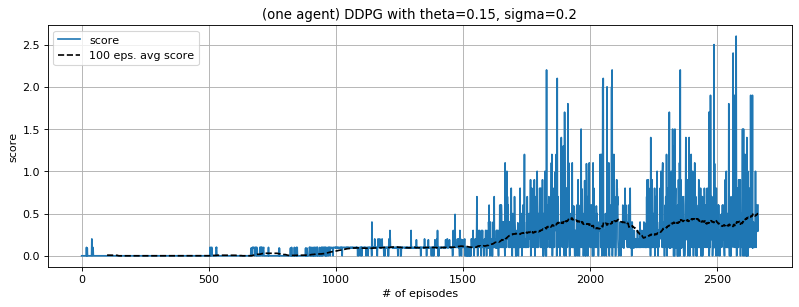

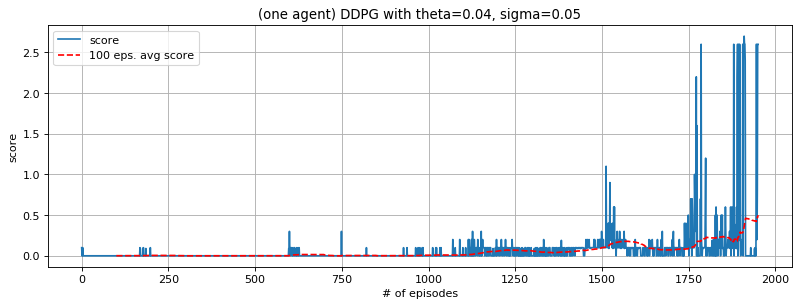

In [11]:
DDPG_score = np.genfromtxt('scores.csv')
DDPG_score2 = np.genfromtxt('scores_smaller_OUnoise.csv')
DDPG_score3 = np.genfromtxt('scores_2agents.csv')

avg_DDPG_score = [DDPG_score[idx-100:idx].mean() for idx in range(len(DDPG_score))]
avg_DDPG_score2 = [DDPG_score2[idx-100:idx].mean() for idx in range(len(DDPG_score2))]
avg_DDPG_score3 = [DDPG_score3[idx-100:idx].mean() for idx in range(len(DDPG_score3))]

plt.figure(num=None, figsize=(12,4), dpi=80)  
plt.plot(DDPG_score, label='score')
plt.plot(avg_DDPG_score,'k--', label='100 eps. avg score')
plt.title('(one agent) DDPG with theta=0.15, sigma=0.2')
plt.xlabel('# of episodes')
plt.ylabel('score')
plt.legend()
plt.grid()

plt.figure(num=None, figsize=(12,4), dpi=80)  
plt.plot(DDPG_score2, label='score')
plt.plot(avg_DDPG_score2,'r--', label='100 eps. avg score')
plt.title('(one agent) DDPG with theta=0.04, sigma=0.05')
plt.xlabel('# of episodes')
plt.ylabel('score')
plt.legend()
plt.grid()


# Results 2. Two-actors / One-critic

This is the result when using two actors(agents) and one shared critic. (The Replay buffer is shared as well)
The BatchSize was 128 instead of 256.

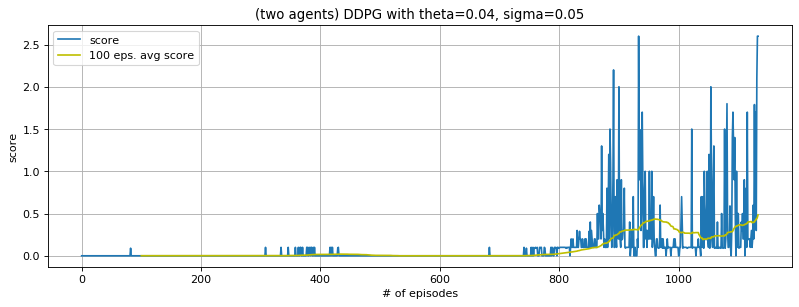

In [12]:
plt.figure(num=None, figsize=(12,4), dpi=80)  
plt.plot(DDPG_score3, label='score')
plt.plot(avg_DDPG_score3,'y-', label='100 eps. avg score')
plt.title('(two agents) DDPG with theta=0.04, sigma=0.05')
plt.xlabel('# of episodes')
plt.ylabel('score')
plt.legend()
plt.grid()
 

# Results 3. Comparison between one agent and two agents

The results show that the two agent case solved the environment with less episodes. 

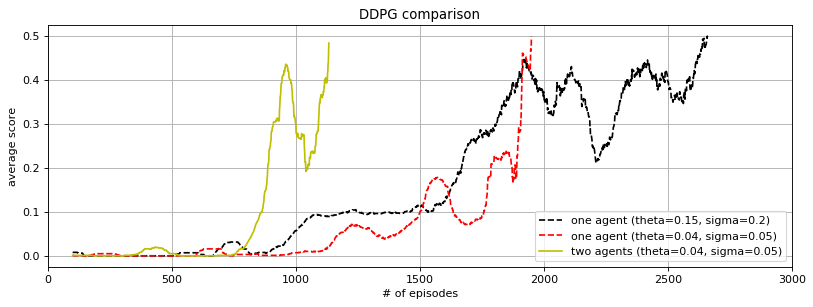

In [10]:
plt.figure(num=None, figsize=(12,4), dpi=80)  
plt.plot(avg_DDPG_score,'k--', label='one agent (theta=0.15, sigma=0.2)')
plt.plot(avg_DDPG_score2,'r--', label='one agent (theta=0.04, sigma=0.05)')
plt.plot(avg_DDPG_score3,'y-', label='two agents (theta=0.04, sigma=0.05)')
plt.title('DDPG comparison')
plt.xlabel('# of episodes')
plt.ylabel('average score')
plt.xlim([0, 3000])
plt.legend()
plt.grid()
 

In [6]:
print('it took {} episodes for the DDPG agent to solve the problem'.format(len(DDPG_score)))
print('it took {} episodes for the DDPG agent to solve the problem'.format(len(DDPG_score2)))
print('it took {} episodes for the DDPG agent to solve the problem'.format(len(DDPG_score3)))

it took 2662 episodes for the DDPG agent to solve the problem
it took 1951 episodes for the DDPG agent to solve the problem
it took 1134 episodes for the DDPG agent to solve the problem


# Ideas for Future Work

* Slightly modify the reward structure in order to introduce a *competition* component in the tennis environment. (Not sure what the purpose of this would be, but the results would be fun to watch. Like watching a cut-throat tennis match perhaps.)



* Read papers of various types of RL algorithms.

* Apply various types of algorithms to various types of workbenchs (including all the benchworks provided by Udacity).

* Find a network architecture that works generally well with all (or most) workbenchs.

* Find a way to intuitively visualize the progress of reinforcement learning. (To gain insight what the agent is doing.)

* Make my own Unity (or a similar environment) model and apply RL.

* Read papers about 'actual' applications of RL, and try to find an application which could be used in my own field.

* Think of new RL models which could be better than previously known methods. 

* Apply CNN, RNN or possibly Autoencoders and GANs to RL.

* Try to reproduce results given in journals. (A simple example would suffice, just to know how others summarize their agent's performance.)